## Import Models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load datasets

In [3]:
df = pd.read_csv(r"G:\Kaggle\Agriculture\Datasets\agriyield-2025\train.csv")

In [4]:
df.head()

,field_id,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi,yield
0,F00001,6.25,2.66,41.6,25.2,70,110.2,0.46,4105.8
1,F00002,6.70,3.66,40.2,26.9,78,126.3,0.59,4247.8
2,F00003,7.21,3.45,40.0,27.6,66,109.4,0.64,4021.8
3,F00004,5.73,2.48,56.9,29.6,79,155.3,0.62,4326.8
4,F00005,6.88,3.61,30.6,25.0,80,172.6,0.62,3708.0


In [5]:
df.shape

(10000, 9)

In [6]:
df.isnull().sum()

field_id          0
soil_ph           0
organic_matter    0
sand_pct          0
temperature       0
humidity          0
rainfall          0
ndvi              0
yield             0
dtype: int64

In [7]:
df.drop("field_id",axis=1, inplace=True)

In [8]:
df.head()

,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi,yield
0,6.25,2.66,41.6,25.2,70,110.2,0.46,4105.8
1,6.70,3.66,40.2,26.9,78,126.3,0.59,4247.8
2,7.21,3.45,40.0,27.6,66,109.4,0.64,4021.8
3,5.73,2.48,56.9,29.6,79,155.3,0.62,4326.8
4,6.88,3.61,30.6,25.0,80,172.6,0.62,3708.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   soil_ph         10000 non-null  float64
 1   organic_matter  10000 non-null  float64
 2   sand_pct        10000 non-null  float64
 3   temperature     10000 non-null  float64
 4   humidity        10000 non-null  int64  
 5   rainfall        10000 non-null  float64
 6   ndvi            10000 non-null  float64
 7   yield           10000 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 625.1 KB


In [10]:
df.describe()

,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi,yield
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.508556,2.748447,44.95785,26.993920,74.523400,140.033850,0.574883,4251.976400
std,0.579959,0.717645,8.65291,1.736847,5.775101,23.026794,0.100168,436.533109
min,5.500000,1.500000,30.00000,24.000000,65.000000,100.000000,0.400000,3500.200000
25%,6.000000,2.130000,37.50000,25.500000,70.000000,120.200000,0.490000,3868.050000
50%,6.510000,2.750000,45.00000,27.000000,75.000000,140.100000,0.570000,4257.150000
75%,7.010000,3.360000,52.40000,28.500000,80.000000,160.200000,0.660000,4638.325000
max,7.500000,4.000000,60.00000,30.000000,84.000000,180.000000,0.750000,5000.000000


# Step 1: Exploratory Data Analysis (EDA)

## 1.1  Target distribution

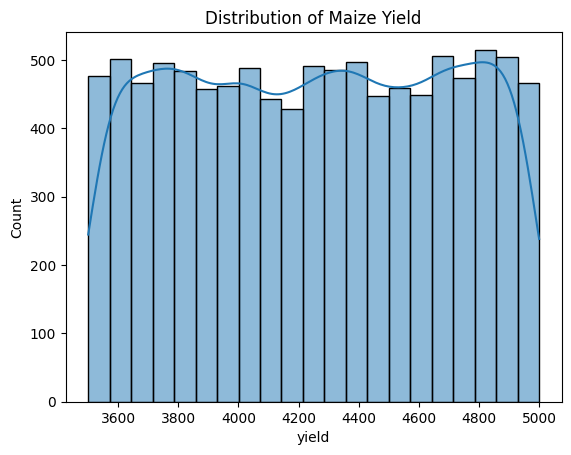

In [11]:
sns.histplot(df['yield'], kde=True)
plt.title("Distribution of Maize Yield")
plt.show()

The distribution of the target columns is appears to be roughly symmetric and bell-shaped.
It is a normal distribution

## 1.2  Univariate Analysis

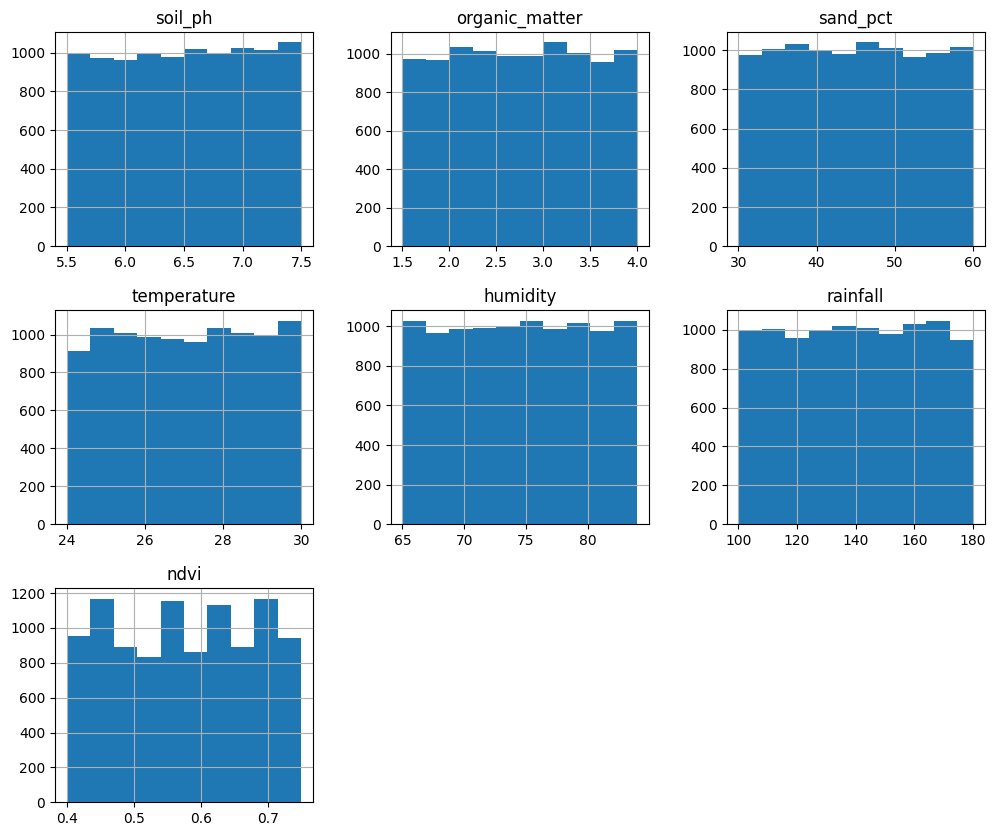

In [12]:
# Histograms for numeric features
numeric_features = ['soil_ph', 'organic_matter', 'sand_pct', 'temperature', 'humidity', 'rainfall', 'ndvi']
df[numeric_features].hist(figsize=(12, 10))
plt.show()


Seems distribution of all the features are symmetric to normal distribution.  (No skewness )

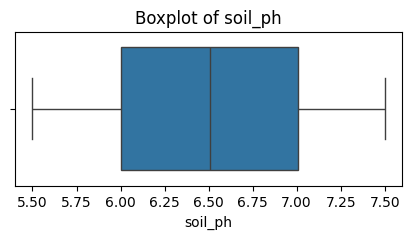

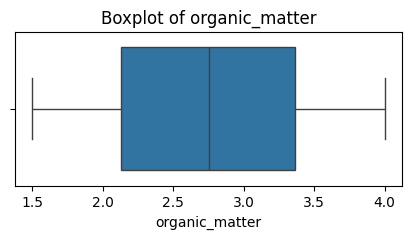

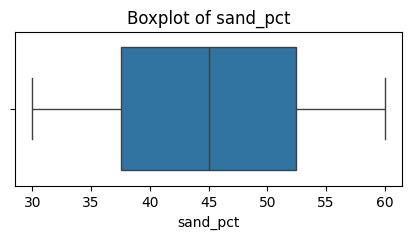

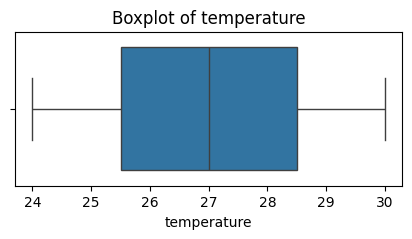

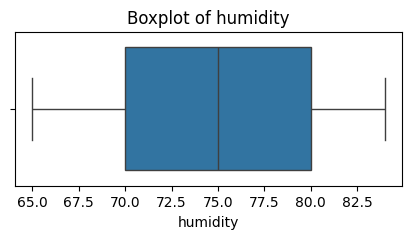

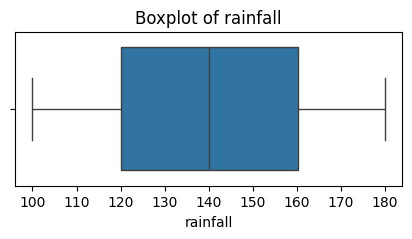

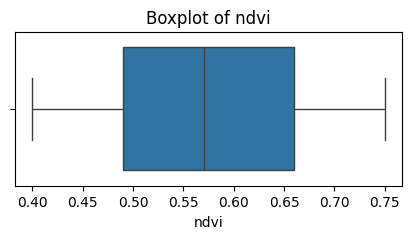

In [13]:
# Boxplots to detect outliers
for feature in numeric_features:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

There is no any outliers in the feature columns.

## 1.3  Bivariate Analysis

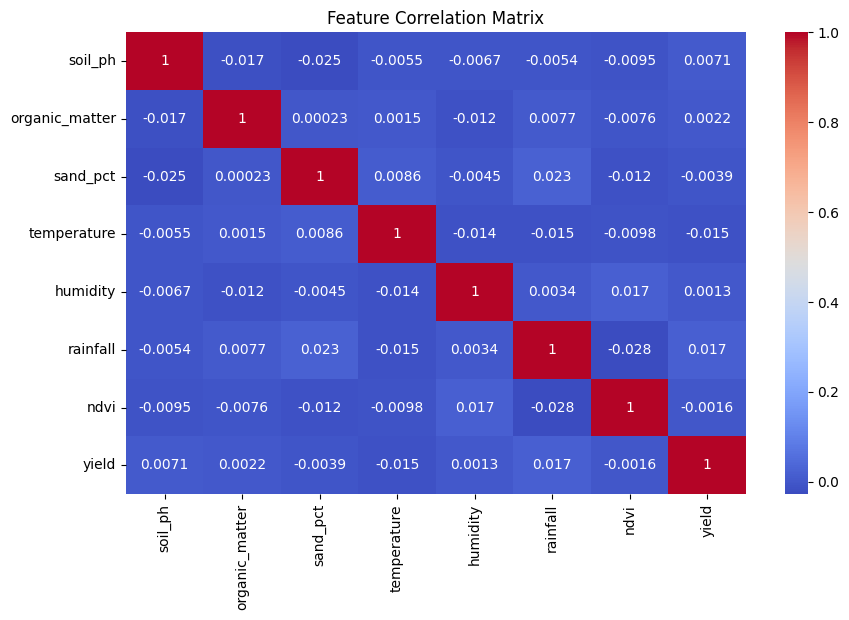

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

There are no strong correlations between any of the features, and crucially, none of the features show a strong correlation with yield. All correlations with yield are extremely close to zero .

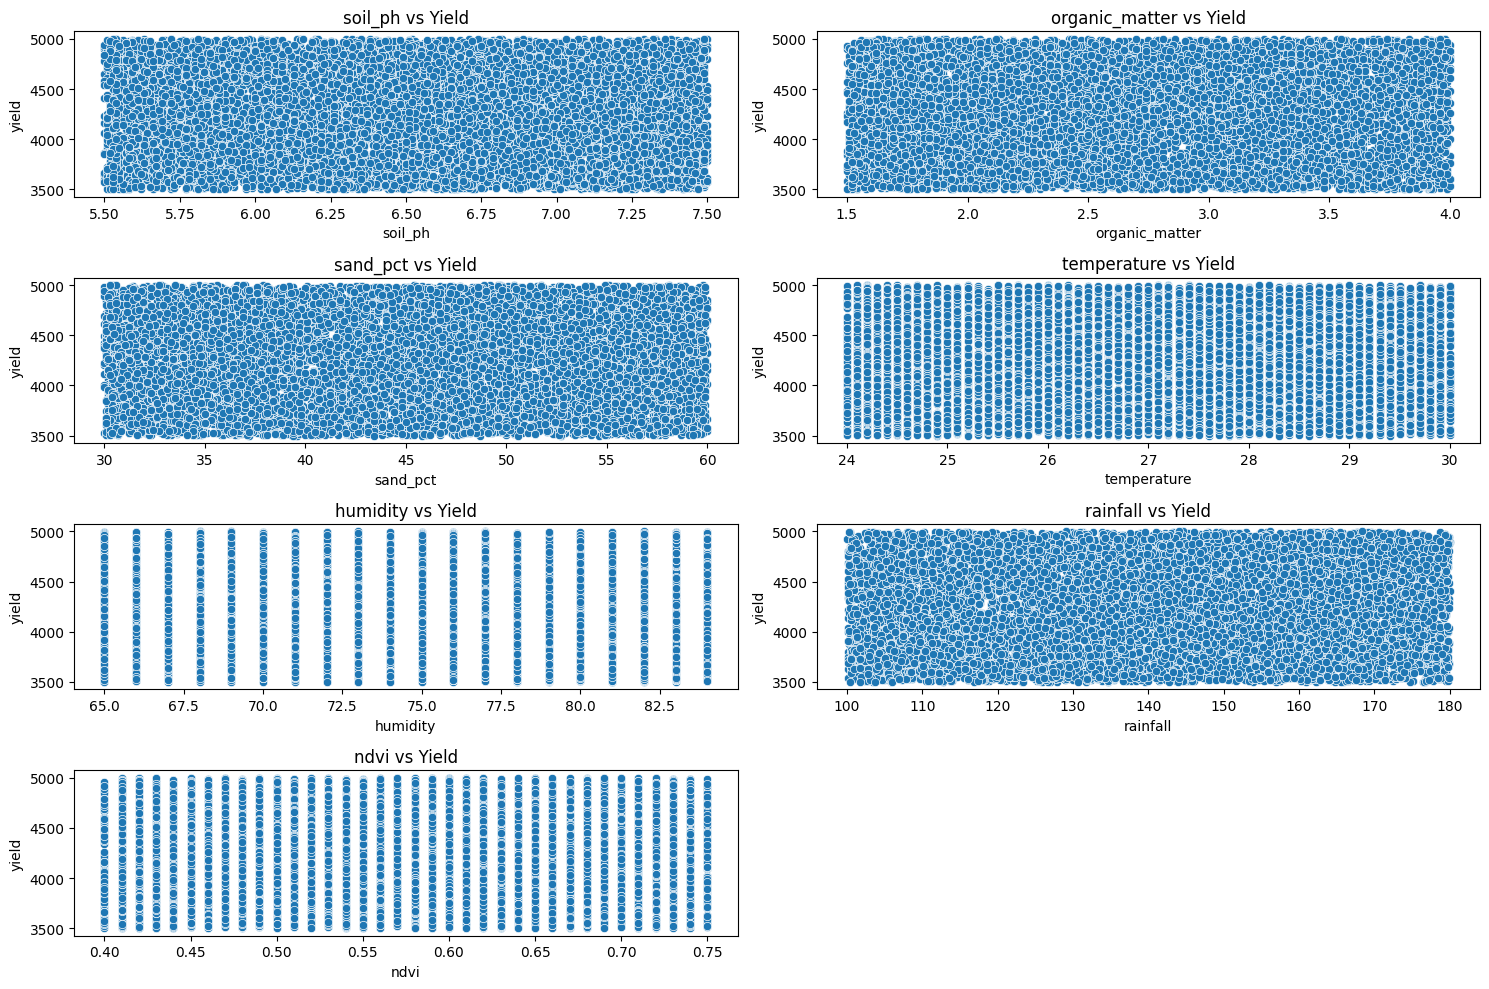

In [15]:
# Scatterplots with target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['soil_ph', 'organic_matter', 'sand_pct', 'temperature', 'humidity', 'rainfall', 'ndvi']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['yield'])
    plt.title(f"{feature} vs Yield")
plt.tight_layout()
plt.show()

scatter plots visually confirm the results of the correlation matrix. There are no strong linear relationships between any of these features and crop yield.

## 1.4 Multivariate Analysis

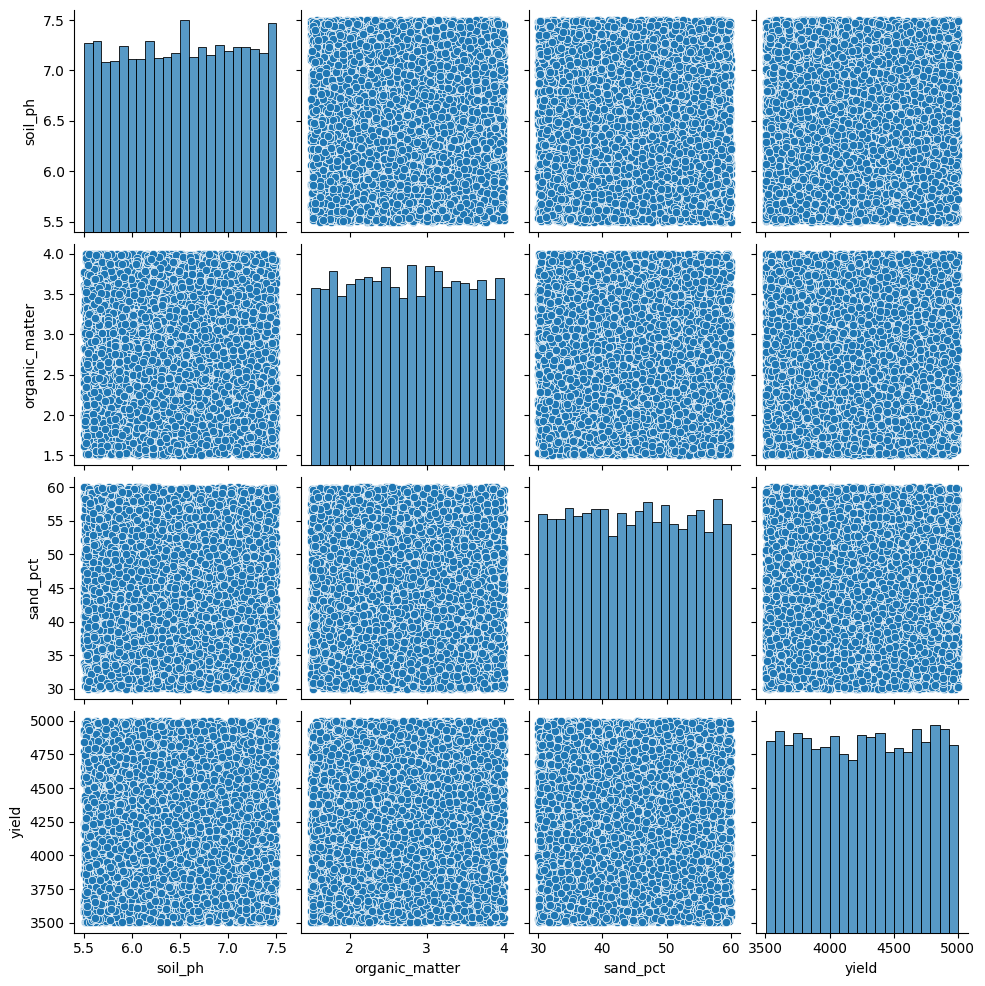

In [16]:
# Pairplot of key features
sns.pairplot(df[['soil_ph', 'organic_matter', 'sand_pct', 'yield']])
plt.show()

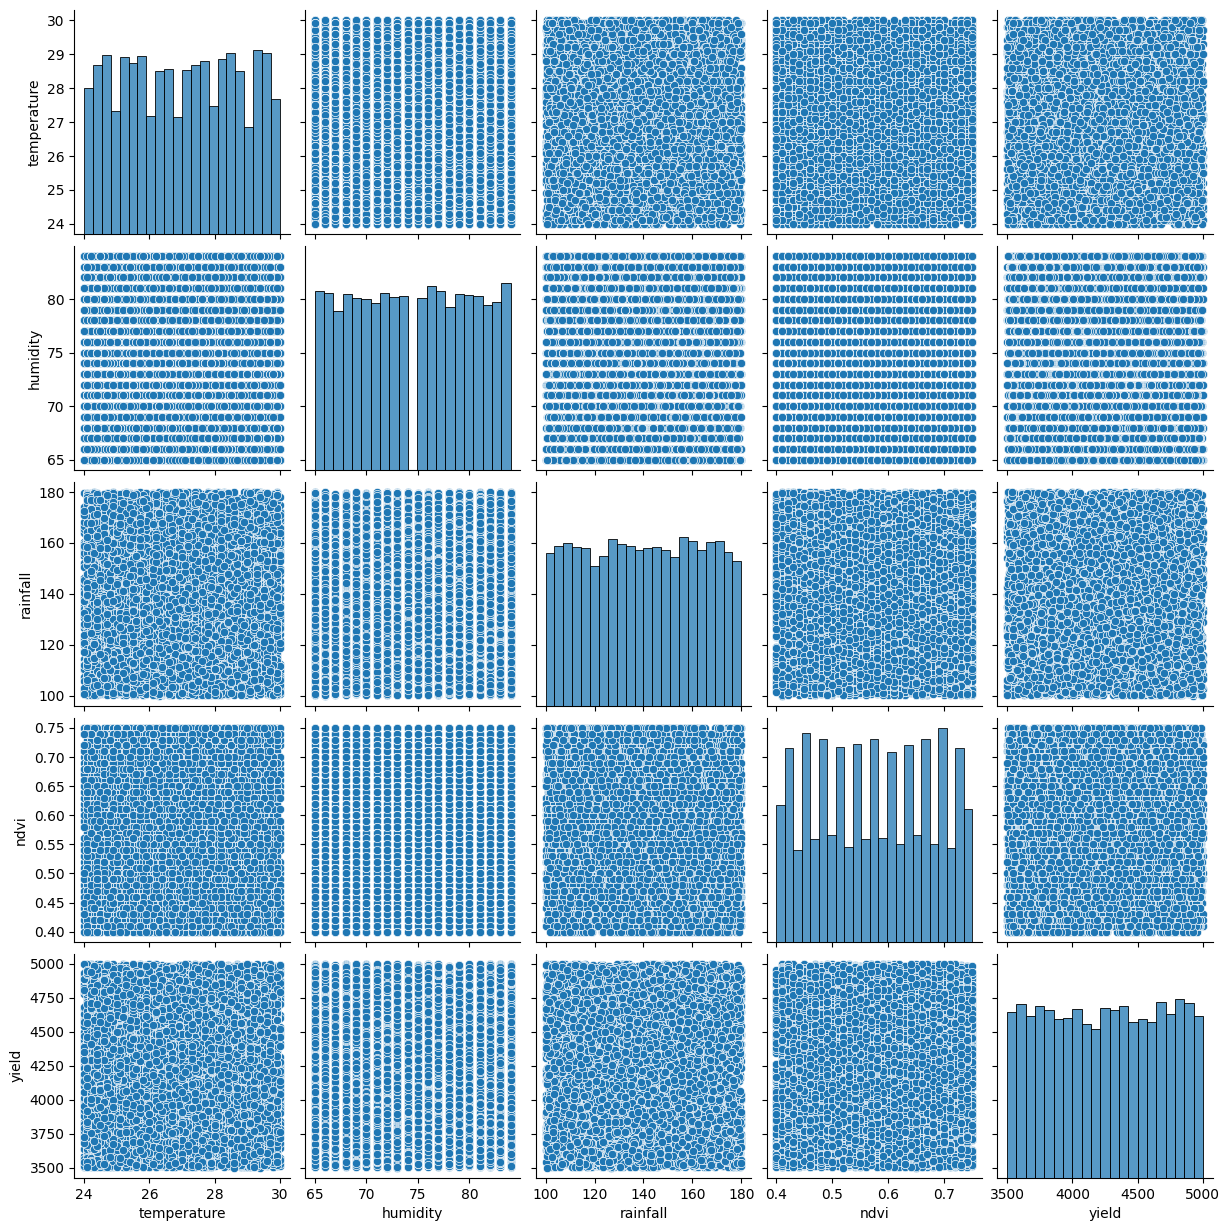

In [17]:
# Pairplot of key features
sns.pairplot(df[[ 'temperature', 'humidity', 'rainfall', 'ndvi','yield']])
plt.show()

Provides the combined view of the correlation and scatter plot 

# Step 2: Feature Engineering

## 2.1 Normalization / Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['soil_ph', 'organic_matter', 'sand_pct', 'temperature', 'humidity', 'rainfall', 'ndvi']])
df_scaled = pd.DataFrame(scaled_features, columns=['soil_ph','organic_matter','sand_pct','temperature','humidity','rainfall','ndvi'])

In [19]:
df_scaled

,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi
0,-0.445840,-0.123252,-0.388080,-1.032912,-0.783298,-1.295679,-1.146956
1,0.330116,1.270264,-0.549883,-0.054078,0.602028,-0.596459,0.150923
2,1.209533,0.977626,-0.572998,0.348972,-1.475961,-1.330423,0.650108
3,-1.342501,-0.374085,1.380200,1.500541,0.775194,0.663006,0.450434
4,0.640498,1.200588,-1.659392,-1.148068,0.948360,1.414343,0.450434
...,...,...,...,...,...,...,...
9995,-0.480327,-1.377417,-1.266441,1.270227,-1.649127,0.697750,1.149292
9996,0.933637,0.071840,-1.405129,0.233815,0.255697,0.689064,-0.547935
9997,0.847420,1.702254,1.195282,-0.054078,-1.302796,-0.262049,-0.847445
9998,1.364724,-1.614315,1.056593,0.809599,1.641023,-0.926526,1.249129


# Step 3: Hypothesis Testing

## 3.1 Correlation Significance Test


In [20]:
from scipy.stats import pearsonr

for feature in ['soil_ph', 'organic_matter', 'sand_pct', 'temperature', 'humidity', 'rainfall', 'ndvi']:
    corr, p_value = pearsonr(df[feature], df['yield'])
    print(f"{feature}: correlation={corr:.3f}, p-value={p_value:.3f}")


soil_ph: correlation=0.007, p-value=0.478
organic_matter: correlation=0.002, p-value=0.825
sand_pct: correlation=-0.004, p-value=0.694
temperature: correlation=-0.015, p-value=0.135
humidity: correlation=0.001, p-value=0.900
rainfall: correlation=0.017, p-value=0.090
ndvi: correlation=-0.002, p-value=0.871


# outcome

- (soil_ph)
Hypothesis Accepted: Null Hypothesis (H₀)
Reason: The high p-value (0.478 > 0.05) means the weak correlation is statistically insignificant and likely due to random chance.

- (organic_matter)
Hypothesis Accepted: Null Hypothesis (H₀)
Reason: The extremely high p-value (0.825 > 0.05) provides no evidence to suggest a real relationship exists.

- (sand_pct)
Hypothesis Accepted: Null Hypothesis (H₀)
Reason: The high p-value (0.694 > 0.05) indicates the very weak negative correlation is not meaningful.

- (temperature)
Hypothesis Accepted: Null Hypothesis (H₀)
Reason: Although the p-value is lower, it still exceeds the threshold (0.135 > 0.05), so it is not statistically significant.

- (humidity)
Hypothesis Accepted: Null Hypothesis (H₀)
Reason: The p-value is very high (0.900 > 0.05), confirming the correlation is just random noise.

- (rainfall)
Hypothesis Accepted: Null Hypothesis (H₀)
Reason: While the strongest relationship found, the p-value (0.090 > 0.05) is still too high to reject the null hypothesis.

- (ndvi)
Hypothesis Accepted: Null Hypothesis (H₀)
Reason: The very high p-value (0.871 > 0.05) means there is no evidence of a linear relationship with yield.

# Step 4: Hypothesis Testing

## 4.1 Correlation Thresholding

In [21]:
cor_target = df.corr()['yield']
relevant_features = cor_target[abs(cor_target) > 0.05].index.tolist()
print("Selected features based on correlation:", relevant_features)

Selected features based on correlation: ['yield']


No feature are selected as all the feature are weekly correlected with the target columns

There is weak corellation also found that there is no meaningful linear relation between the features and the target columns.  So that rejecting the linear regression models

# Step 5: Train test Split

In [22]:
X = df_scaled
y = df["yield"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Step 6: Hyperparameter Tuning

In [24]:
# Model import

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from xgboost import XGBRegressor

In [25]:
model_params = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5],
            'weights': ['uniform', 'distance']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 5, 10]
        }
    },
    'svm': {
        'model': svm.SVR(),
        'params': {
            'C': [1, 10],
            'kernel': ['rbf', 'linear']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1]
        }
    },
    'xgboost': {
        'model': XGBRegressor(random_state=42, verbosity=0),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    }
}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3 ,scoring="r2", return_train_score=False)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    scores.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'mse':mse,
        'r2':r2,
        'rmse': rmse
    })
df = pd.DataFrame(scores,columns=['model','best_params','mse','r2','rmse'])
df.sort_values(by= 'r2', ascending=False, inplace=True)
df.reset_index(drop=True)

,model,best_params,mse,r2,rmse
0,random_forest,"{'max_depth': 10, 'n_estimators': 100}",149362.072119,0.211700,386.473896
1,knn,"{'n_neighbors': 5, 'weights': 'uniform'}",153367.608819,0.190559,391.621768
2,decision_tree,{'max_depth': 5},185674.504296,0.020051,430.899645
3,xgboost,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",185864.477857,0.019048,431.120027
4,gradient_boosting,"{'learning_rate': 0.05, 'n_estimators': 50}",186044.034589,0.018100,431.328221
5,svm,"{'C': 1, 'kernel': 'rbf'}",188799.441843,0.003558,434.510577


Based on the hyperparameter tuning random_forest is the suitable model. It has lowest rmse error on max_depth= 10 and n_estimators: 100.
So choosing random forest model


# Step 7: Model Training

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=10, n_estimators= 100, random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [29]:
# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("✅ Random Forest Results")
print(f"Train MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.3f}")
print(f"Test  MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.3f}")

✅ Random Forest Results
Train MSE: 148630.46, RMSE: 385.53, R²: 0.221
Test  MSE: 190880.56, RMSE: 436.90, R²: -0.007


# Step 8: Model Saving

In [30]:
import pickle

# Save the model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("✅ Model saved successfully as random_forest_model.pkl")

✅ Model saved successfully as random_forest_model.pkl


In [31]:
import pickle

# Save the scalling/ Normalization
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Normalization file saved successfully as scaler.pkl")

✅ Normalization file saved successfully as scaler.pkl


# Step 9: Testing on the test data

In [32]:
# load test data csv

test_data = pd.read_csv(r"G:\Kaggle\Agriculture\Datasets\agriyield-2025\test.csv")
test_data.head(2)


,field_id,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi
0,T00001,6.25,2.15,47.2,27.9,82,176.5,0.6
1,T00002,7.40,2.12,54.2,25.0,74,167.5,0.5


In [33]:
# Remove field id from test data
test_data.drop('field_id',axis=1,inplace=True)
test_data.head(2)

,soil_ph,organic_matter,sand_pct,temperature,humidity,rainfall,ndvi
0,6.25,2.15,47.2,27.9,82,176.5,0.6
1,7.40,2.12,54.2,25.0,74,167.5,0.5


In [34]:
# Normalization of the test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(test_data[['soil_ph', 'organic_matter', 'sand_pct', 'temperature', 'humidity', 'rainfall', 'ndvi']])
test_data_scaled = pd.DataFrame(scaled_features, columns=['soil_ph','organic_matter','sand_pct','temperature','humidity','rainfall','ndvi'])

In [35]:
# prediction using the model
test_predict = rf_model.predict(test_data_scaled)


In [36]:
test_predict

array([4253.10260435, 4274.89003714, 4283.02575031, ..., 4208.56988864,
       4283.58181763, 4209.80034915], shape=(2000,))